# 1.Import libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 2.Import Dataset

In [48]:
zoo_data=pd.read_csv('Zoo.csv')
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 3.Data Understanding

In [49]:
zoo_data.shape

(101, 18)

In [50]:
zoo_data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [51]:
pd.set_option('max_columns',None)

In [52]:
zoo_data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [53]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [54]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [55]:
zoo_data['animal name'].value_counts()

frog        2
herring     1
wolf        1
crab        1
toad        1
           ..
slowworm    1
gull        1
piranha     1
antelope    1
pitviper    1
Name: animal name, Length: 100, dtype: int64

In [56]:
zoo_data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

# 4.Data Preprocessing

In [57]:
del zoo_data['animal name']

In [58]:
zoo_data.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

# 5.Model Building

In [59]:
X=zoo_data.drop('type',axis=1)
y=zoo_data[['type']]

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=67)

In [61]:
X_train.shape,y_train.shape

((80, 16), (80, 1))

In [62]:
X_test.shape,y_test.shape

((21, 16), (21, 1))

In [63]:
knn_classifier=KNeighborsClassifier()

# 6.Model Training

In [64]:
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
weights = ['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[25,30,35,40,45]
grid={'weights':weights,'algorithm':algorithm,'leaf_size':leaf_size}

In [66]:
grid_search_cv=GridSearchCV(estimator=knn_classifier,param_grid=grid)
grid_search_cv.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40, 45],
                         'weights': ['uniform', 'distance']})

In [67]:
grid_search_cv.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 25, 'weights': 'distance'}

# 7.Model Testing | Model Evaluation

#### Train data

In [68]:
y_pred_train=knn_classifier.predict(X_train)

In [69]:
accuracy_score(y_train,y_pred_train)

0.9125

#### Test data

In [70]:
y_pred_test=knn_classifier.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred_test)

0.9047619047619048

# We need to make all features into same scale so we do standarization

In [72]:
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


# Getting Optimal value for K

In [73]:
container_cv_scores = []

for i in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(estimator =knn_model, X = X_scaled,y=y,cv = 5)
    container_cv_scores.append(cv_scores.mean())
container_cv_scores

[0.9504761904761905,
 0.9400000000000001,
 0.9304761904761906,
 0.9204761904761906,
 0.9400000000000001,
 0.93,
 0.9200000000000002,
 0.9099999999999999,
 0.8604761904761906,
 0.8704761904761906,
 0.8804761904761905,
 0.8604761904761904,
 0.8604761904761904,
 0.8704761904761904,
 0.8609523809523809,
 0.870952380952381,
 0.8614285714285714,
 0.8614285714285714,
 0.8614285714285714,
 0.8519047619047619,
 0.8519047619047619,
 0.8219047619047618,
 0.8219047619047618,
 0.8219047619047618,
 0.8019047619047619,
 0.7823809523809524,
 0.7823809523809524,
 0.7823809523809524,
 0.7823809523809524,
 0.7728571428571428]

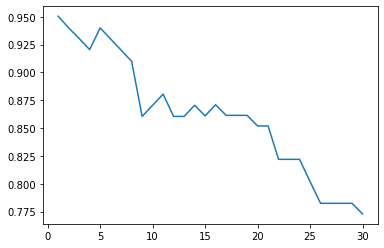

In [74]:
plt.plot(range(1,31),container_cv_scores)
plt.show()

In [75]:
container_cv_scores

[0.9504761904761905,
 0.9400000000000001,
 0.9304761904761906,
 0.9204761904761906,
 0.9400000000000001,
 0.93,
 0.9200000000000002,
 0.9099999999999999,
 0.8604761904761906,
 0.8704761904761906,
 0.8804761904761905,
 0.8604761904761904,
 0.8604761904761904,
 0.8704761904761904,
 0.8609523809523809,
 0.870952380952381,
 0.8614285714285714,
 0.8614285714285714,
 0.8614285714285714,
 0.8519047619047619,
 0.8519047619047619,
 0.8219047619047618,
 0.8219047619047618,
 0.8219047619047618,
 0.8019047619047619,
 0.7823809523809524,
 0.7823809523809524,
 0.7823809523809524,
 0.7823809523809524,
 0.7728571428571428]

# So optimal value for K is 5

# Building Final Model

In [76]:
knn_final=KNeighborsClassifier(algorithm='ball_tree',leaf_size=25,weights='distance',n_neighbors=5)

In [77]:
knn_final.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, weights='distance')

In [78]:
y_pred_train=knn_final.predict(X_train)

In [79]:
accuracy_score(y_train,y_pred_train)

1.0

In [80]:
y_pred_test=knn_final.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred_test)

0.9523809523809523

# Random Over Sampling for Imbalanced data

In [86]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [83]:
ror=RandomOverSampler(random_state=899)

In [87]:
X_ror,y_ror=ror.fit_resample(X_train,y_train)
print(sorted(Counter(y_ror).items()),y_ror.shape)

[('type', 1)] (231, 1)


In [88]:
y_train.shape

(80, 1)

In [89]:
knn_final.fit(X_ror,y_ror)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, weights='distance')

### Train data

In [90]:
y_pred_train_ror=knn_final.predict(X_train)

In [91]:
print(accuracy_score(y_train,y_pred_train_ror))
print(confusion_matrix(y_train,y_pred_train_ror))
print(classification_report(y_train,y_pred_train_ror))

1.0
[[33  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         8

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### Test data

In [92]:
y_pred_test_ror=knn_final.predict(X_test)

In [93]:
print(accuracy_score(y_test,y_pred_test_ror))
print(confusion_matrix(y_test,y_pred_test_ror))
print(classification_report(y_test,y_pred_test_ror))

1.0
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### After Over sampling we had increased accuracy,precision,recall and also solved overfitting problem